In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'../data/Air quality 2021.csv')
dataset.head()

,station,date,PM 2.5,PM 10,TSP,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Bhimdatta,1/1/2021,108.76,153.01,218.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bhimdatta,1/2/2021,86.04,141.10,196.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Bhimdatta,1/3/2021,143.80,202.20,231.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bhimdatta,1/4/2021,143.80,202.20,231.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bhimdatta,1/5/2021,97.80,142.74,196.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset = dataset.iloc[:, 0:5].sort_values(by='date')
dataset.head()

,station,date,PM 2.5,PM 10,TSP
0,Bhimdatta,1/1/2021,108.760000,153.010000,218.05000
1707,Bhaktapur,1/1/2021,95.640000,169.700000,241.80000
3056,Biratnagar,1/1/2021,166.126252,195.463234,230.41915
3430,Dhankuta,1/1/2021,41.700000,70.200000,145.80000
1405,Bhaisipati,1/1/2021,91.600000,141.000000,228.80000


In [4]:
dataset.shape

(4017, 5)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4017 entries, 0 to 1398
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  4017 non-null   object 
 1   date     4017 non-null   object 
 2   PM 2.5   3975 non-null   float64
 3   PM 10    3903 non-null   float64
 4   TSP      3897 non-null   float64
dtypes: float64(3), object(2)
memory usage: 188.3+ KB


In [6]:
dataset.describe()

,PM 2.5,PM 10,TSP
count,3975.000000,3903.000000,3897.000000
mean,46.068697,66.322237,115.604067
std,40.116836,62.999242,128.032793
min,1.900000,1.600000,2.100000
25%,13.400000,18.000000,24.800000
50%,34.714097,46.300000,71.200000
75%,67.530000,98.200000,159.300000
max,284.758959,462.300000,952.300000


In [7]:
dataset.isnull().sum()

station      0
date         0
PM 2.5      42
PM 10      114
TSP        120
dtype: int64

Text(0.5, 1.0, 'Missing value Heatmap')

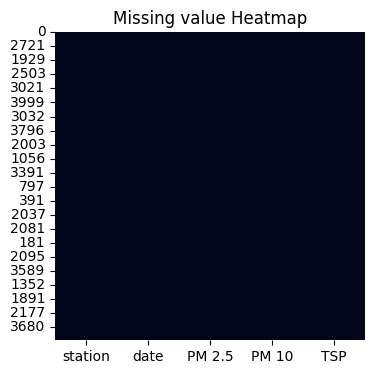

In [11]:
plt.figure(figsize=(4,4))
sns.heatmap(dataset.isnull(), cbar=False)
plt.title("Missing value Heatmap")

In [9]:
dataset = dataset.ffill()

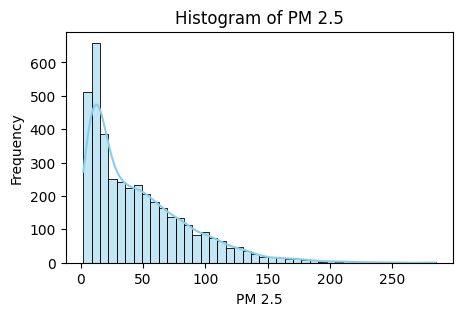

C:\Users\Dell\AppData\Local\Temp\ipykernel_8628\2011785053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="station", y=col, data=dataset, palette="Set2")


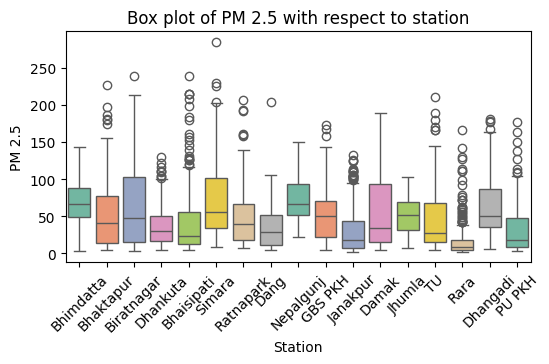

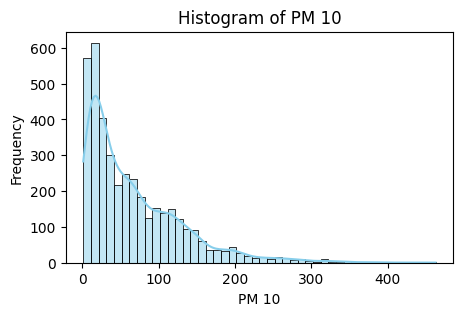

C:\Users\Dell\AppData\Local\Temp\ipykernel_8628\2011785053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="station", y=col, data=dataset, palette="Set2")


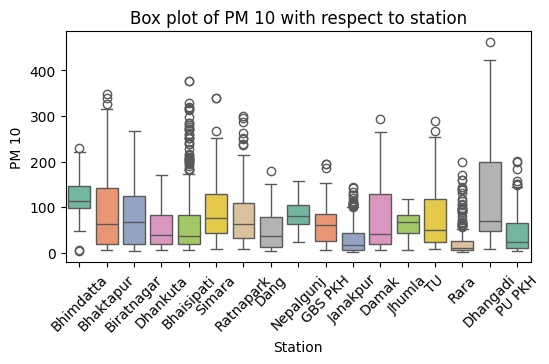

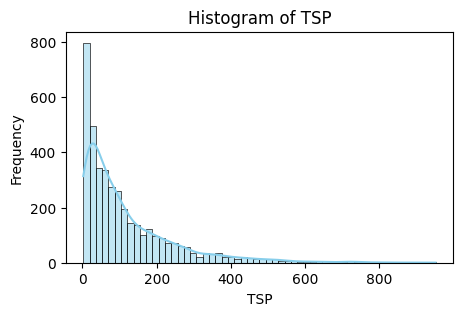

C:\Users\Dell\AppData\Local\Temp\ipykernel_8628\2011785053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="station", y=col, data=dataset, palette="Set2")


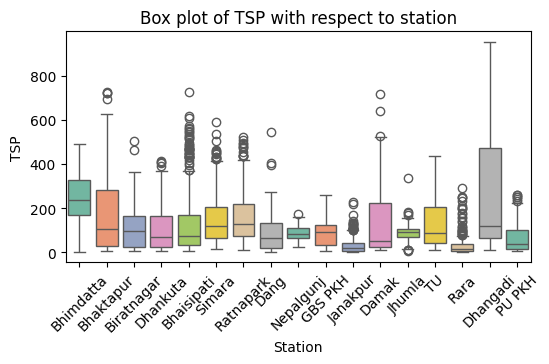

In [17]:
for col in ["PM 2.5", "PM 10", "TSP"]:
    # Histogram
    plt.figure(figsize=(5, 3))
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x="station", y=col, data=dataset, palette="Set2")
    plt.title(f"Box plot of {col} with respect to station")
    plt.xlabel("Station")
    plt.xticks(rotation=45)
    plt.ylabel(col)
    plt.show()


In [18]:
import plotly.express as px

In [21]:
station_mean = dataset.groupby('station')[["PM 2.5", "PM 10", "TSP"]].mean().reset_index()

px.bar(station_mean, x='station', y='PM 2.5', title='Average PM2.5 by Station', color='station')


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Bhaisipati',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Bhaisipati',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Bhaisipati'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 't1F1QtQ6RUA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Bhaktapur',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Bhaktapur',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Bhaktapur'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'ayfYLX4ZSUA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Bhimdatta',
              'marker': {'color': '#00cc96', 'pattern': {'shape': ''}},
              'name': 'Bhimdatta',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Bhimdatta'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'uwvW+eHBUUA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Biratnagar',
              'marker': {'color': '#ab63fa', 'pattern': {'shape': ''}},
              'name': 'Biratnagar',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Biratnagar'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'YTfV5BCXTkA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Damak',
              'marker': {'color': '#FFA15A', 'pattern': {'shape': ''}},
              'name': 'Damak',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Damak'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'PyGlH9uGTEA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Dang',
              'marker': {'color': '#19d3f3', 'pattern': {'shape': ''}},
              'name': 'Dang',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Dang'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': '97cjuauQQUA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Dhangadi',
              'marker': {'color': '#FF6692', 'pattern': {'shape': ''}},
              'name': 'Dhangadi',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Dhangadi'], dtype=object),
              'xaxis': 'x',
              'y': {'bdata': 'VVVVVVUlUEA=', 'dtype': 'f8'},
              'yaxis': 'y'},
             {'hovertemplate': 'station=%{x}<br>PM 2.5=%{y}<extra></extra>',
              'legendgroup': 'Dhankuta',
              'marker': {'color': '#B6E880', 'pattern': {'shape': ''}},
              'name': 'Dhankuta',
              'orientation': 'v',
              'show